In [2]:
import numpy as np
#from matplotlib import cm
from matplotlib import pyplot as plt
from scipy import fftpack 
from sklearn.preprocessing import minmax_scale

x_(n+1) = 4*x_n*(1-x_n) with x_0 = 0.2

In [2]:
#returns logistic map values for initial condition a and num steps n
def logistic_map(n, a, coeff=4):
    memo = [0]*(n)
    memo[0] = a
    for i in range(1, n):
        x_old = memo[i-1]
        memo[i] = coeff*x_old*(1-x_old)
    return np.array(memo)

def pi_digits():
    memo = []
    filenm = "pi.txt"
    f = open(filenm, "r")
    for line in f.readlines():
        for ch in line:
            if ch != '\n':
                memo.append(int(ch))
    return np.array(memo)

#returns fiboncacci sequence of size n
def fibonacci(n):
    if n > 90:
        print("int overflow expected for n={}".format(n))
        return
    memo = [0] * n
    memo[1] = 1
    for i in range(2,n):
        memo[i] = memo[i-1]+memo[i-2]
    return np.array(memo)

#returns fiboncacci sequence of size n mod prime number m
def fibonacci_mod_prime(n, m):
    memo = [0] * n
    memo[1] = 1
    for i in range(2,n):
        memo[i] = memo[i-1]+memo[i-2]
        if memo[i] >= m:
            memo[i] %= m
    return np.array(memo)

#returns sine values for initial condition a (phase) and num steps n and frequency f
def sine(n, a, f):
    t = np.arange(0, n)
    #T = 1.0 / n
    #x = np.linspace(0.0, n*T, n)
    #y = np.sin(2.0*np.pi* (x + a))
    return np.sin((t/f + a) * 2*np.pi)

def lyapunov_logistic(x, coeff=4, iterations=100):
    result = []
    for t in range(iterations):
        x = coeff * x * (1 - x)
        result.append(np.log(abs(coeff - 2*coeff*x)))
    return np.mean(result)


In [47]:
sig = lyapunov_logistic(0.2, coeff=4, iterations=10000)

In [56]:
np.log(100000)/sig

16.609657503026515

In [57]:
1/sig

1.442696519973472

In [55]:
np.log(100000000000)/sig

36.54124650665833

In [22]:
b = fibonacci(90)

In [3]:
t = np.arange(0, 10000)
a = logistic_map(10000,0.2) 
c = fibonacci_mod_prime(10000, 113)
d = sine(1000, 0, 25)
e = pi_digits()

In [4]:
title_a = r'$x_{n+1} = 4x_n(1-x_n)$'
title_c = r'$x_n = Fib(n)$ mod $113$'
title_d = r'$y = sin(\omega t)$'
title_e = r'$x_n = Digits_{\pi}(n)$'

In [5]:
def plot_fig(x,y,title, x_label, y_label, linewidth=1):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.tight_layout()
    plt.plot(x,y, linewidth=linewidth)

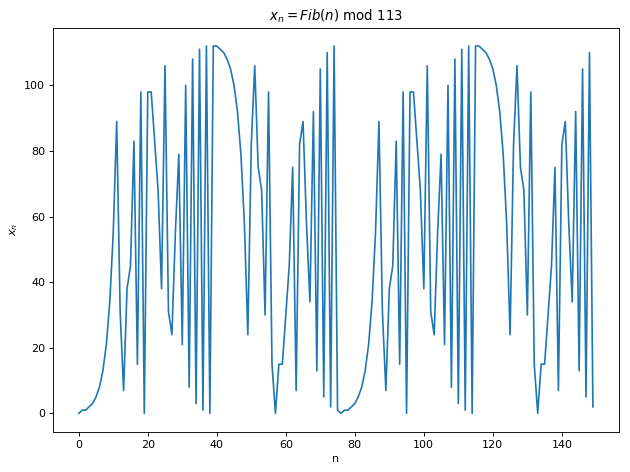

In [78]:
plot_fig(t[:150],c[:150],title_c,'n',r'$x_n$')

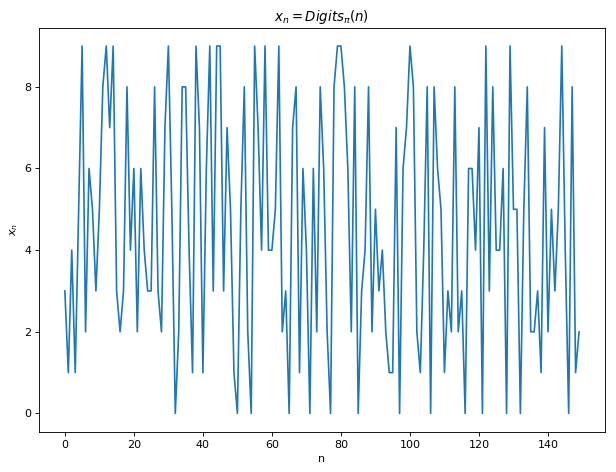

In [77]:
plot_fig(t[:150],e[:150],title_e,'n',r'$x_n$')

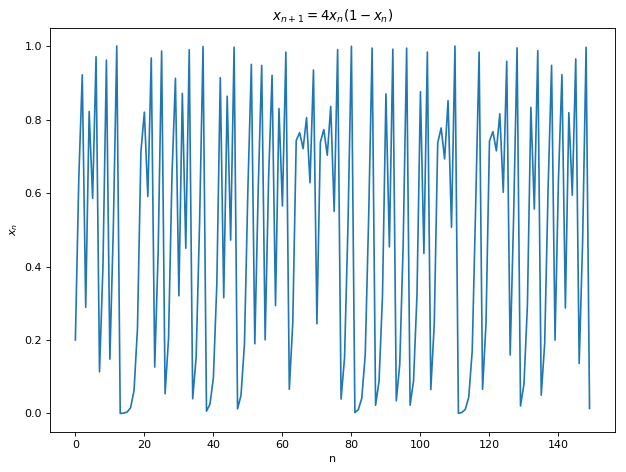

In [79]:
plot_fig(t[:150],a[:150],title_a,'n',r'$x_n$')

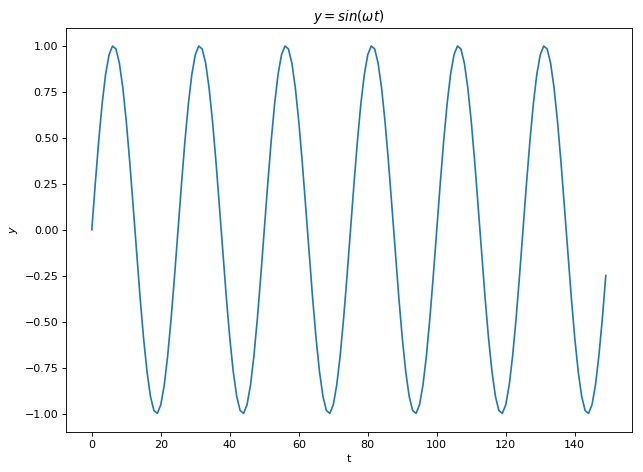

In [82]:
plot_fig(t[:150],d[:150],title_d,'t',r'$y$')

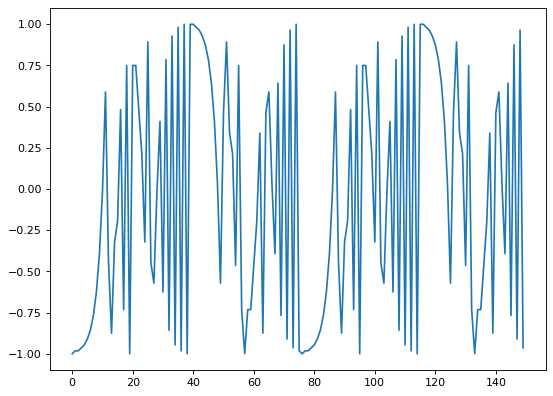

In [6]:
#scaler = MinMaxScaler(feature_range=(0, 1))
c_ = 2*minmax_scale(c)-1
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t[:150],c_[:150])

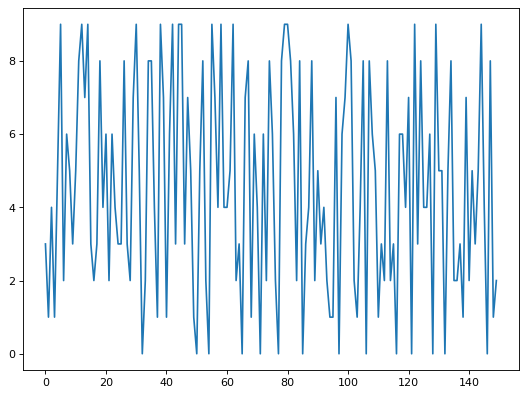

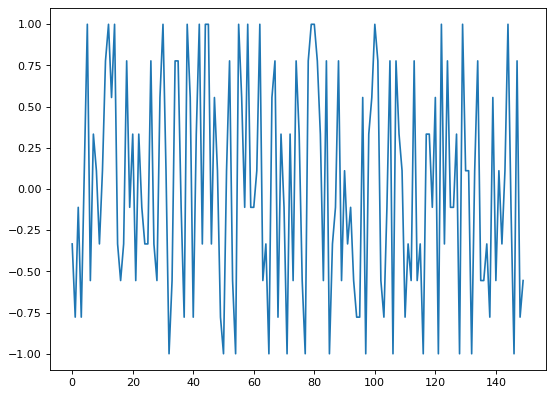

In [7]:
#scaler = MinMaxScaler(feature_range=(0, 1))
e_ = 2*minmax_scale(e)-1
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t[:150],e_[:150])

In [327]:
#from statsmodels.graphics.tsaplots import plot_acf
#plt.figure(figsize=(10,10))
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plot_acf(a_bin, lags=150)
#plt.savefig("./sine_autocorr.jpg")
#plt.acorr(e_, maxlags=100, usevlines=False, linestyle="-", marker='o')

NameError: name 'a_bin' is not defined

<Figure size 640x480 with 0 Axes>

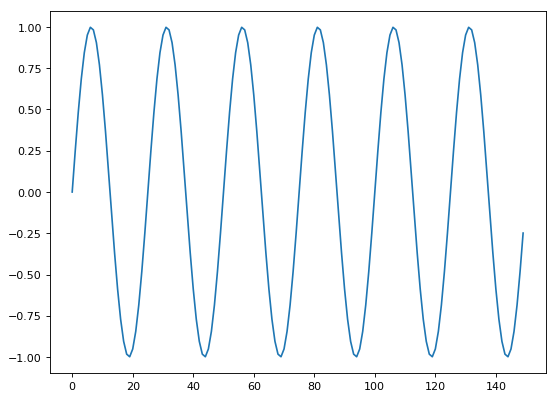

In [25]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(t[:150],d[:150])

In [158]:
#plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
def get_fft(d,title=""):
    d = d-np.mean(d)
    d_fft = fftpack.fft(d)
    n = d_fft.size
    freq = fftpack.fftfreq(n) * 1
    f_s = 1
    maxf = np.argmax(np.abs(d_fft))
    #d_fft[maxf] = 0
    fig, ax = plt.subplots()
    fig.set_size_inches(8,6, forward=True)
    ax.stem(freq, np.abs(d_fft))
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(0, f_s/2 )
    ax.set_title(title)
    #ax.set_ylim(-5, 750)
    pos_idcs = freq > 0
    d_fft_pos = d_fft[pos_idcs]
    freq_pos = freq[pos_idcs]
    highest_100_amps = d_fft_pos.argsort()[-100:][::-1]
    highest_100_freqs =  freq_pos[highest_100_amps]
    return highest_100_freqs, highest_100_amps
    #print(maxf, freq[maxf])

def sum_of_sines(n, freqs, coeffs):
    out = np.zeros(n)
    for i, freq in enumerate(freqs):
        #sinusoid = 1/(len(coeffs))*(abs(coeffs[i])*np.cos(freq*2*np.pi*x+cmath.phase(fft3[i])))
        out += coeffs[i]*sine(n, 0, 1/freq)/len(coeffs)
    return out

def get_fft2(n, data, l, title=""):
    import cmath
    c = n*1.0/l
    d = data[:l]
    x = np.arange(0, n)
    d = d-np.mean(d)
    d_fft = fftpack.fft(d)
    freqs = fftpack.fftfreq(d_fft.size) * 1
    #x_fft = 
    #freqs = fftfreq(len(x),.01)
    threshold = 0
    recomb = np.zeros((len(x),))
    middle = len(d)//2 + 1
    """
    pos_idcs = freqs > 0
    d_fft_pos = d_fft[pos_idcs]
    freq_pos = freqs[pos_idcs]
    d_fft = d_fft_pos.argsort()[-100:][::-1]
    freqs =  freq_pos[d_fft]
    middle = len(d_fft)
    """
    for i in range(middle):
        if abs(d_fft[i]) > threshold:
            if i == 0:
                coeff = 2
            else:
                coeff = 1
            sinusoid = c/(len(x)*coeff/2)*(abs(d_fft[i])*np.cos(freqs[i]*2*np.pi*x+cmath.phase(d_fft[i])))
            recomb += sinusoid
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Fourier Reconstruction: " + title)
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(x, data[:n], label = "original dataset",color = 'C0')
    plt.plot(x[l:],recomb[l:], label = "test set", color='C2')
    plt.plot(x[:l+1], recomb[:l+1], label = "training set", color='C1')
    plt.legend(loc='upper right')
    #plt.plot(x,recomb,x,sin3)
    #plt.show()

In [ ]:
get_fft(d[:1000], "y = sin(ωt)")

(array([0.36 , 0.093, 0.381, 0.332, 0.089, 0.085, 0.391, 0.284, 0.161,
        0.23 , 0.146, 0.462, 0.409, 0.289, 0.499, 0.193, 0.337, 0.175,
        0.039, 0.211, 0.452, 0.365, 0.133, 0.159, 0.004, 0.434, 0.476,
        0.15 , 0.239, 0.291, 0.111, 0.026, 0.167, 0.194, 0.43 , 0.072,
        0.17 , 0.422, 0.419, 0.401, 0.259, 0.18 , 0.498, 0.009, 0.139,
        0.022, 0.21 , 0.425, 0.102, 0.273, 0.238, 0.068, 0.268, 0.496,
        0.402, 0.101, 0.207, 0.378, 0.084, 0.443, 0.366, 0.42 , 0.418,
        0.454, 0.134, 0.14 , 0.158, 0.487, 0.225, 0.017, 0.417, 0.135,
        0.202, 0.046, 0.051, 0.456, 0.229, 0.423, 0.019, 0.1  , 0.362,
        0.094, 0.295, 0.205, 0.482, 0.016, 0.446, 0.486, 0.162, 0.293,
        0.098, 0.305, 0.217, 0.356, 0.153, 0.151, 0.369, 0.031, 0.06 ,
        0.49 ]),
 array([359,  92, 380, 331,  88,  84, 390, 283, 160, 229, 145, 461, 408,
        288, 498, 192, 336, 174,  38, 210, 451, 364, 132, 158,   3, 433,
        475, 149, 238, 290, 110,  25, 166, 193, 429,  71

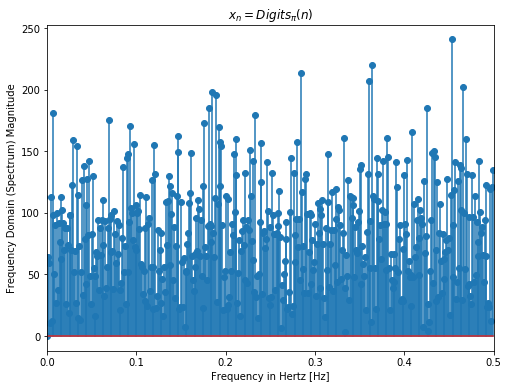

In [105]:
get_fft(e[:1000], title_e)

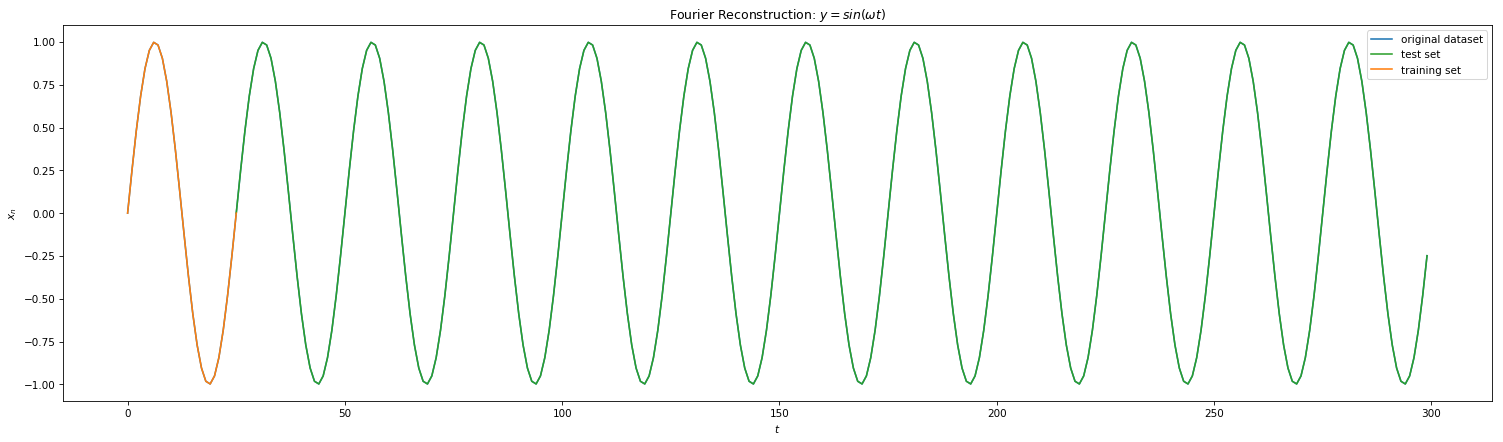

In [159]:
get_fft2(300, d, 25,title_d)

In [8]:
a_ =  2*(a-0.5)
#get_fft2(300,a_, 150, title_a)

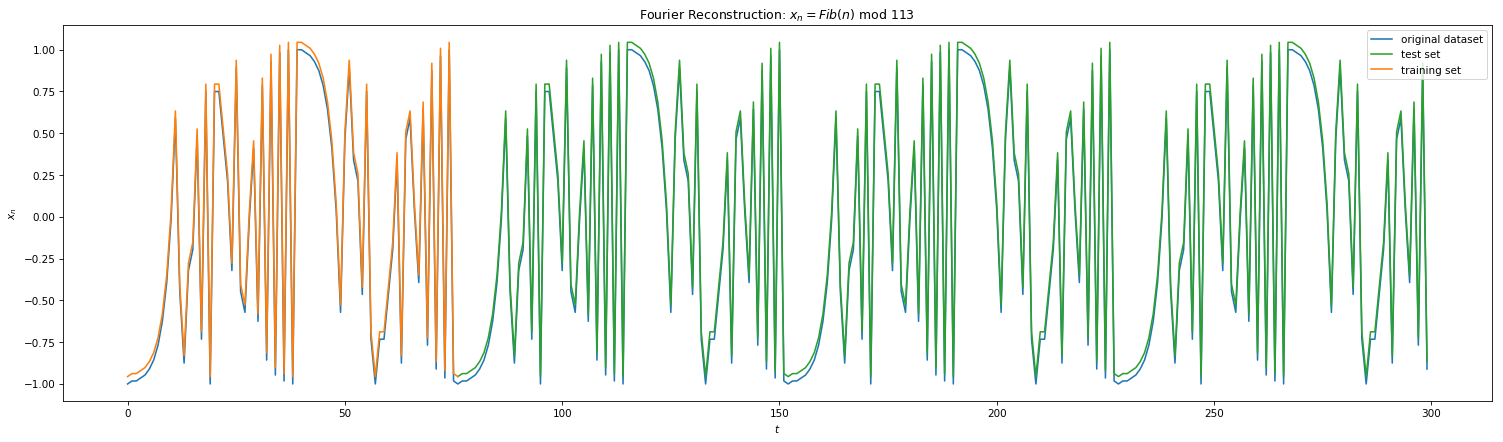

In [162]:
get_fft2(300, c_, 76,title_c)

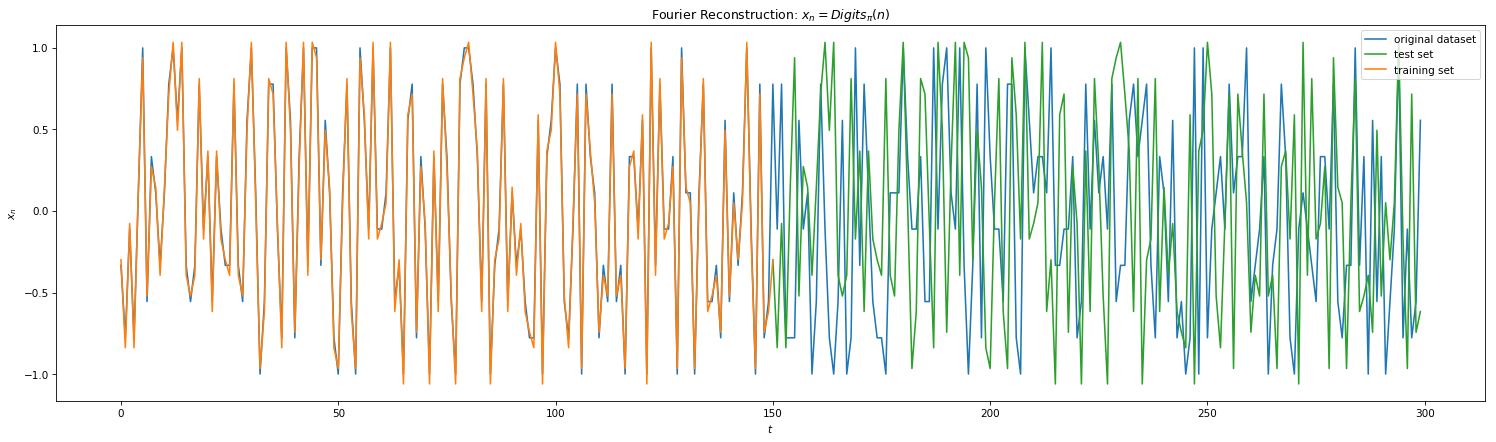

In [163]:
get_fft2(300, e_, 150, title_e)

In [9]:
get_fft(a[:1000],"x_{n+1} = 4x_n(1-x_n)")

NameError: name 'get_fft' is not defined

/home/mbastola/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


(array([0.48684211, 0.09210526, 0.27631579, 0.19736842, 0.43421053,
        0.46052632, 0.35526316, 0.38157895, 0.32894737, 0.44736842,
        0.28947368, 0.18421053, 0.25      , 0.34210526, 0.23684211,
        0.13157895, 0.02631579, 0.39473684, 0.07894737, 0.17105263,
        0.11842105, 0.14473684, 0.03947368, 0.42105263, 0.10526316,
        0.36842105, 0.47368421, 0.15789474, 0.26315789, 0.31578947,
        0.05263158, 0.21052632, 0.06578947, 0.30263158, 0.22368421,
        0.40789474, 0.01315789]),
 array([36,  6, 20, 14, 32, 34, 26, 28, 24, 33, 21, 13, 18, 25, 17,  9,  1,
        29,  5, 12,  8, 10,  2, 31,  7, 27, 35, 11, 19, 23,  3, 15,  4, 22,
        16, 30,  0]))

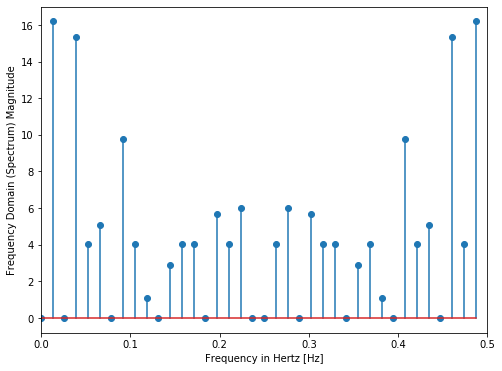

In [311]:
get_fft(c_[:76])

In [96]:
T = 3*np.pi/4
x = np.linspace(0.0, T, 1000)
y = np.sin(2.0*np.pi* (x + 0))

In [115]:
T

2.356194490192345

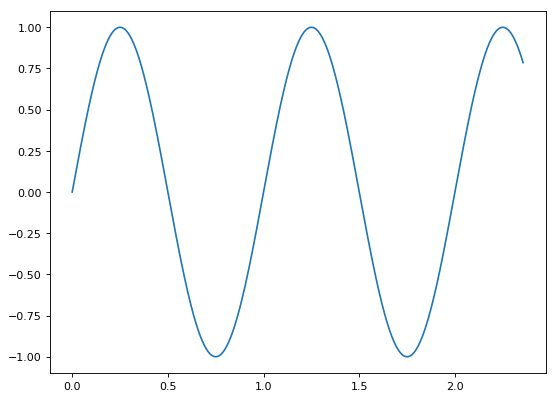

In [98]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y)

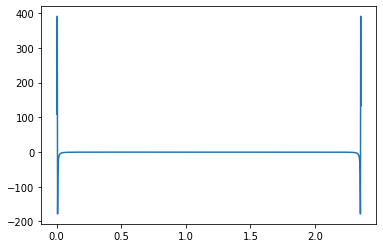

In [114]:
y_fft = fft(y)
#plt.ylim((.5, -.5))  
plt.plot(x,y_fft)

In [26]:
viridis = cm.get_cmap('viridis', 256)

In [30]:
viridis

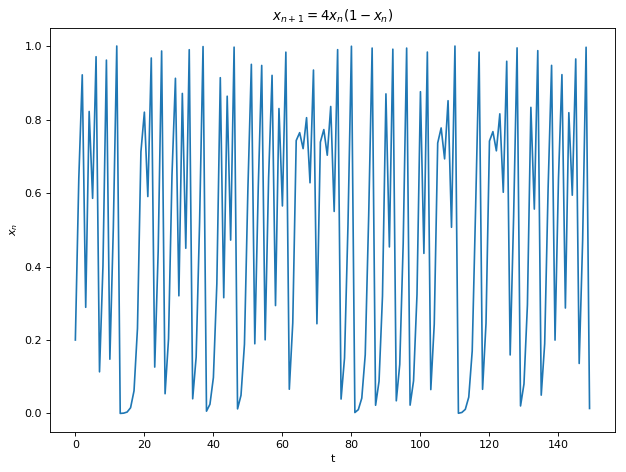

In [7]:

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title(title_a)
plt.ylabel(r"$x_n$")
plt.xlabel("t")
plt.tight_layout()
#mpl.style.use('default')

plt.plot(t[:150],a[:150])

In [18]:
print([ 'H' if x > 0.5 else 'T' for x in a[:20] ])

['T', 'H', 'H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'H']


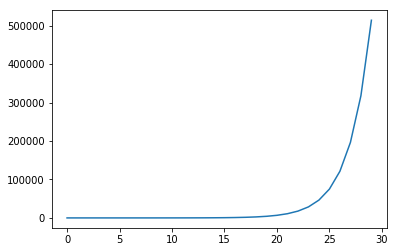

In [29]:
plt.plot(t[:30],b[:30])

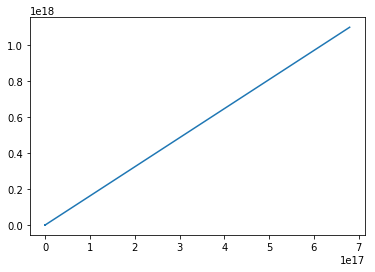

In [28]:
plt.plot(b[:-2], b[1:-1])

In [268]:
b = (a>0.5).astype(np.int64)

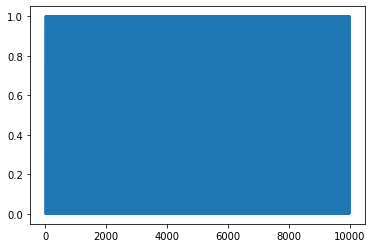

In [263]:
plt.plot(t, b)

In [149]:
b.std()

0.5

In [150]:
b.mean()

0.5

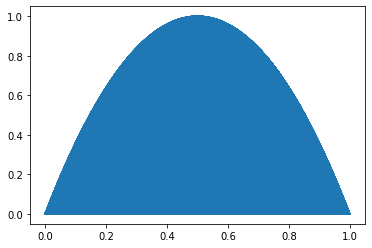

In [151]:
plt.plot(a[:-1], a[1:])

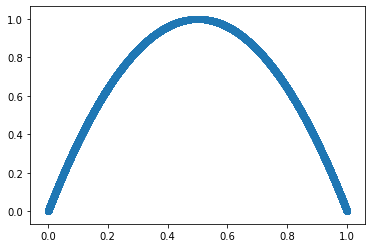

In [152]:
plt.scatter(a[:-1], a[1:])

In [145]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [156]:
y=estimated_autocorrelation(c)

In [158]:
y[9956]

1.0217408098401637

<Figure size 640x480 with 0 Axes>

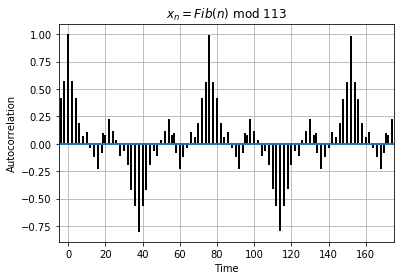

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
#fig = plt.figure(figsize=(10,10))
#plt.grid(linestyle='-', linewidth=0.5)
#kwargs = {"figure":plt.figure(figsize=(10,10))}
#plot_acf(np.array(c),  lags=500)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
plt.xlim(-5,175)
plt.title(title_c)
plt.ylabel("Autocorrelation")
plt.xlabel("Time")
ax.acorr(c_, usevlines=True, normed=True, maxlags=175, lw=2)
ax.grid(True)
plt.savefig("fib_auto_corr.png")

<Figure size 640x480 with 0 Axes>

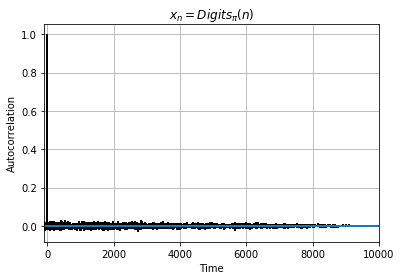

In [107]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
plt.xlim(-100,10000)
plt.title(title_e)
plt.ylabel("Autocorrelation")
plt.xlabel("Time")
ax.acorr(e_, usevlines=True, normed=True, maxlags=9999, lw=2)
ax.grid(True)
plt.savefig("pi_auto_corr_.png")

<Figure size 640x480 with 0 Axes>

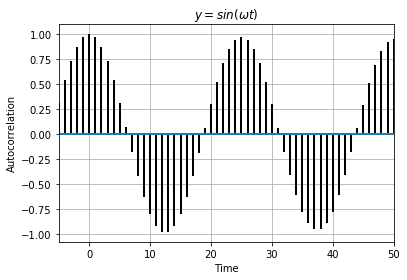

In [110]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
plt.xlim(-5,50)
plt.title(title_d)
plt.ylabel("Autocorrelation")
plt.xlabel("Time")
ax.acorr(d, usevlines=True, normed=True, maxlags=100, lw=2)
ax.grid(True)
plt.savefig("sine_auto_corr_.png")

<Figure size 640x480 with 0 Axes>

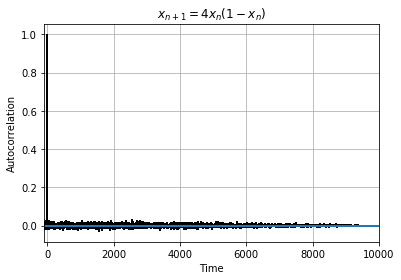

In [111]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
plt.xlim(-100,10000)
plt.title(title_a)
plt.ylabel("Autocorrelation")
plt.xlabel("Time")
ax.acorr(2*(a-0.5), usevlines=True, normed=True, maxlags=9999, lw=2)
ax.grid(True)
plt.savefig("logistic_auto_corr_.png")

In [198]:
c_[75:85].tolist()

[-0.9823008849557522,
 1.0,
 -0.9823008849557522,
 -0.9823008849557522,
 -0.9646017699115044,
 -0.9469026548672567,
 -0.911504424778761,
 -0.8584070796460177,
 -0.7699115044247787,
 -0.6283185840707964]

In [199]:
c_[:15].tolist()

[-1.0,
 -0.9823008849557522,
 -0.9823008849557522,
 -0.9646017699115044,
 -0.9469026548672567,
 -0.911504424778761,
 -0.8584070796460177,
 -0.7699115044247787,
 -0.6283185840707964,
 -0.3982300884955752,
 -0.026548672566371723,
 0.5752212389380531,
 -0.4513274336283186,
 -0.8761061946902655,
 -0.32743362831858414]

In [160]:
corr = np.correlate(c, c, "full")
corr.argmax()

9999

In [161]:
corr[9999]

52446956

In [211]:
from scipy import stats

chi2_stat, p_val = stats.chisquare(b)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===P-Value===")
print(p_val)


===Chi2 Stat===
5000.0


===P-Value===
1.0


In [252]:
c = 0.5*(np.sin(t/100 * 2*np.pi) + 1)

In [163]:
chi2_stat, p_val = stats.chisquare(c)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===P-Value===")
print(p_val)

===Chi2 Stat===
4997.157532834743


===P-Value===
1.0


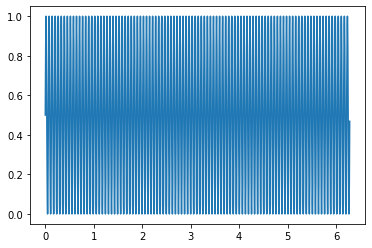

In [253]:
plt.plot(t/10000 * 2*np.pi,c )

In [170]:
stats.ttest_1samp(a=c, popmean=1)

Ttest_1sampResult(statistic=0.05602589530074938, pvalue=0.95532229749154)

In [173]:
def get_means(a):
    means = [0] * len(a)
    past_mean = 0
    for i, item in enumerate(a):
        means[i] = running_mean(past_mean, i, item)
        past_mean = means[i]
    return means

def running_mean(cur_mean, cur_n, x):
    return (cur_mean * cur_n + x)/(cur_n + 1)

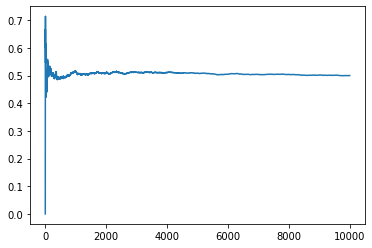

In [177]:
m = get_means(b)
plt.plot(t, m)

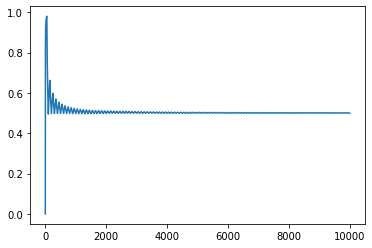

In [256]:
m2 = get_means(d)
plt.plot(t, m2)

In [234]:
def running_ttest(a):
    st = [0] * len(a)
    pvals = [0] * len(a)
    for i in range(0,len(a),10):
        s,p = stats.ttest_1samp(a=a[:i], popmean=0.5)
        st[i]=s
        pvals[i]=p
    return stats, pvals

In [235]:
s,p = running_ttest(b)

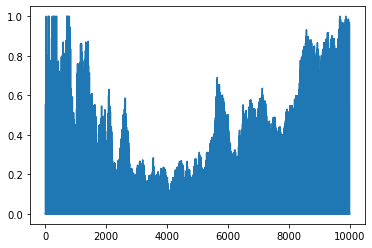

In [236]:
plt.plot(t,p)

In [254]:
d = (c > 0.5).astype(np.int64)

In [240]:
def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

In [255]:
entropy1(d)

0.6931466805598621

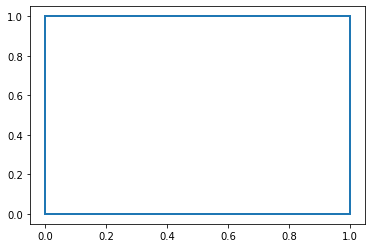

In [128]:
d_bin = (d > 0).astype(int)
plt.plot(d_bin[:-1], d_bin[1:])

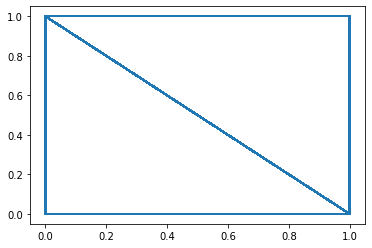

In [129]:
c_bin = (c_ > 0).astype(int)
plt.plot(c_bin[:-1], c_bin[1:])

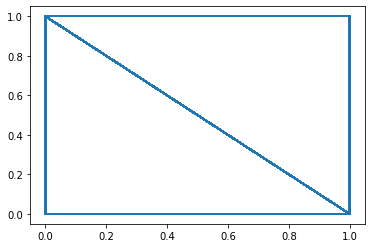

In [130]:
e_bin = (e_ > 0).astype(int)
plt.plot(e_bin[:-1], e_bin[1:])

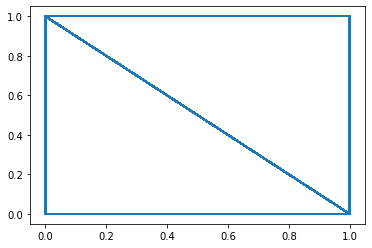

In [277]:
plt.plot( b[:-1], b[1:])

In [124]:
f = np.random.binomial(1,0.5,10000)

In [273]:
e

array([1, 1, 0, ..., 1, 1, 0])

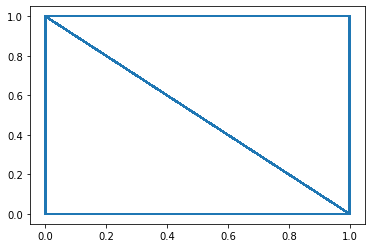

In [125]:
plt.plot(f[:-1], f[1:])

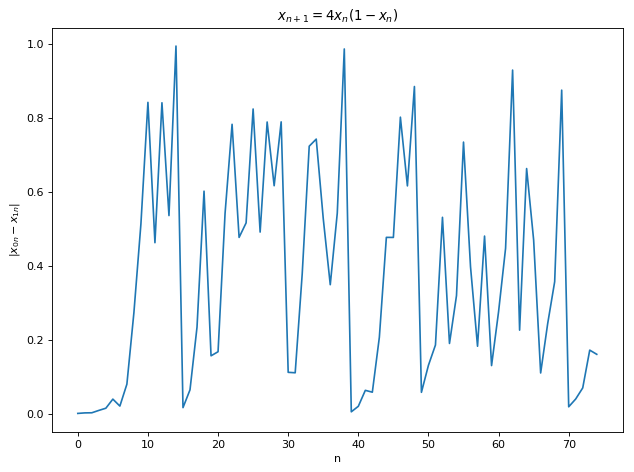

In [119]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x0 = 0.2
x01 = 0.201
c1 = logistic_map(10000, x0)
c2 = logistic_map(10000, x01)
delta = np.abs(c1-c2)
#delta = abs(c1-c2)
plt.ylabel(r'$x_n$')
plt.xlabel("n")
plt.title(title_a)
plt.plot(c1[:75],label="x00 = {}".format(x0))
plt.plot(c2[:75], label="x10 = {}".format(x01))
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("./logistc_lyaounov_0.2_1e-3_.jpg")
plt.clf()
plt.tight_layout()
plt.title(title_a)
plt.plot(delta[0:75])
plt.ylabel(r'$|x_{0n} - x_{1n}|$')
plt.xlabel("n")
#plt.legend(loc='upper right')
plt.savefig("./logistc_lyaounov_0.2_1e-3_diff_.jpg")

In [406]:
(delta > 0.1)[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True])

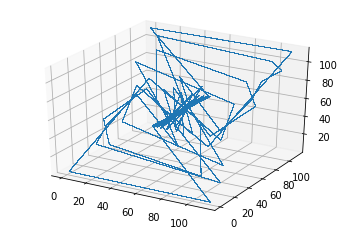

<Figure size 640x480 with 0 Axes>

In [97]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot3D(c[:-2], c[1:-1], c[2:], linewidth=0.1)
#plt.scatter(e[:-1], e[1:])

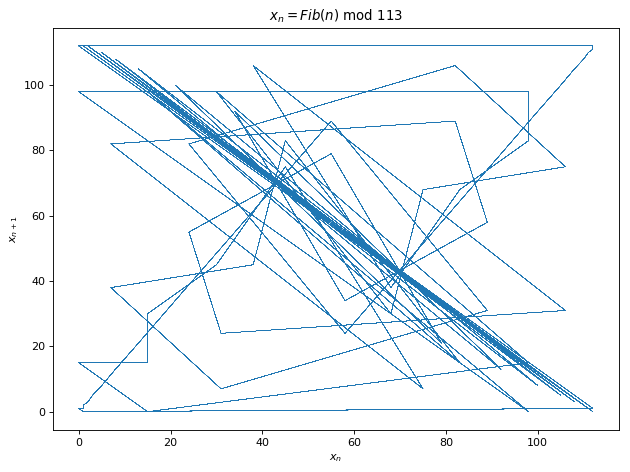

In [128]:
plot_fig(c[:-1],c[1:],title_c,r'$x_n$',r'$x_{n+1}$',0.02)

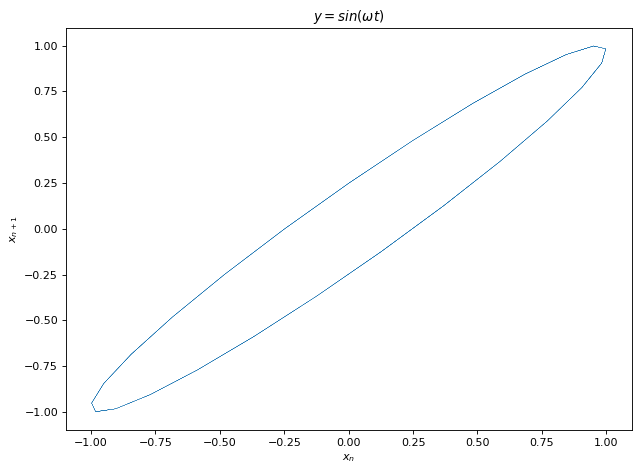

In [126]:
plot_fig(d[:-1],d[1:],title_d,r'$x_n$',r'$x_{n+1}$',0.02)

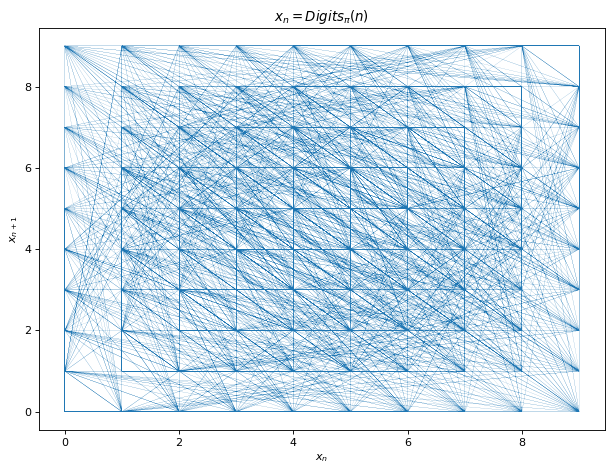

In [127]:
plot_fig(e[:-1],e[1:],title_e,r'$x_n$',r'$x_{n+1}$',0.02)

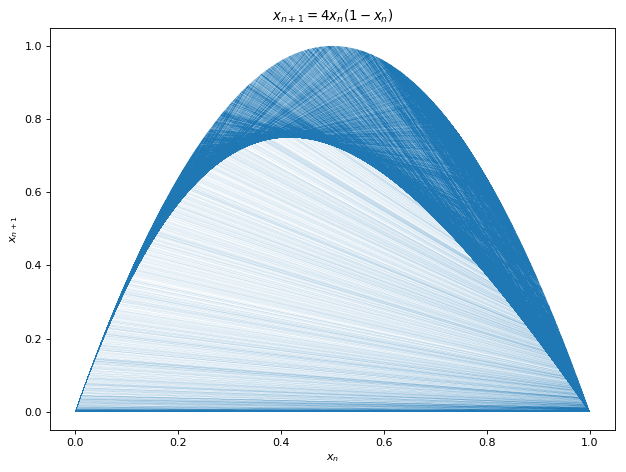

In [124]:
plot_fig(a[:-1],a[1:],title_a,r'$x_n$',r'$x_{n+1}$',0.02)

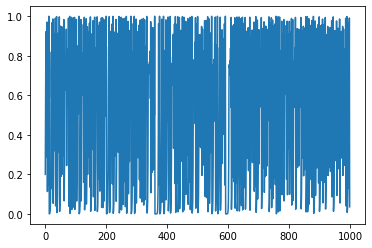

In [59]:
cn = logistic_map(1000, 0.2, 4)
plt.plot(cn)

In [2]:
from scipy.optimize import fsolve, root, fixed_point


In [85]:
def f1(x_n, coeff):
    return coeff * x_n * (1-x_n)
    
def f(x_n, depth, coeff):
    if depth == 0:
        return x_n
    return f( coeff * x_n * (1-x_n), depth-1, coeff)

def period3(x_n):
    return f(x_n,3,4) - x_n

In [253]:
root(period3, 0.98)

    fjac: array([[-1.]])
     fun: array([-2.40918396e-14])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.83143711e-09])
       r: array([9.00011869])
  status: 1
 success: True
       x: array([0.96984631])

In [87]:
f(0.969846310002,3,4)

0.9698463135205879

In [100]:
xs = []
for i, r in enumerate(np.linspace(0, 4, 1000)):
    x = 0.2
    for j in range(1000):
        x = f1(x, r)
    for j in range(100):
        x = f1(x, r)
        xs.append((r, x))
xs = np.array(xs)

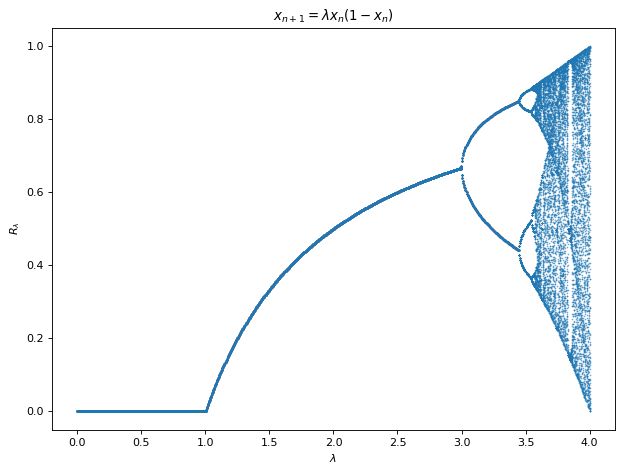

In [101]:
#xs=np.nan_to_num(xs)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title(r'$x_{n+1} = \lambda x_n(1-x_n)$')
plt.ylabel(r'$R_{\lambda}$')
plt.xlabel(r'$\lambda$')
plt.tight_layout()
plt.scatter(xs[:,0], xs[:,1], s=0.1)
#plt.plot(xs[:,0], xs[:,1])
#plt.axis([0,5,-0.5, 1.1])

In [146]:
xs[:,0]

array([0. , 0. , 0. , ..., 4.5, 4.5, 4.5])

In [281]:
def sine_map(n, a=0.2):
    memo = [0]*(n)
    memo[0] = a
    for i in range(1, n):
        x_old = memo[i-1]
        memo[i] = np.sin(x_old)
    return np.array(memo)

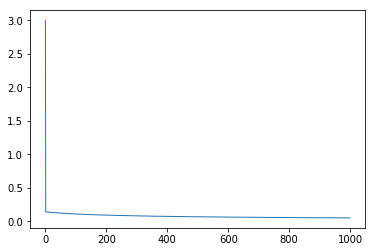

In [292]:
f = sine_map(1000,3)
plt.plot(t[:1000], f, linewidth=1)

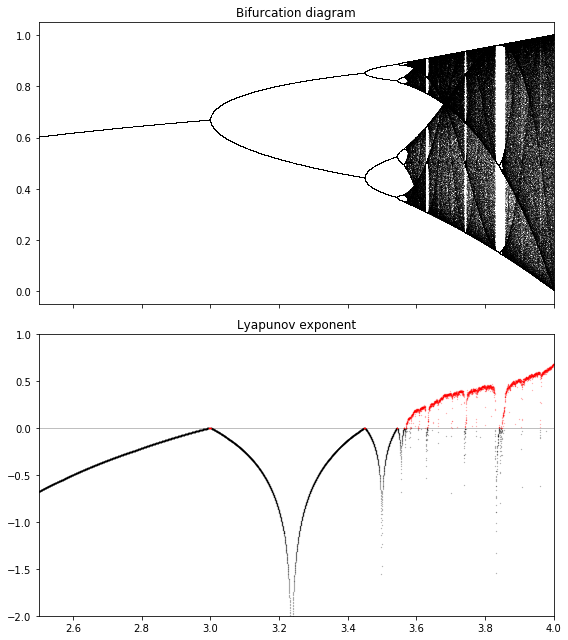

In [378]:
def logistic(x,r):
    return r * x * (1 - x)
n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic( x, r)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()


In [379]:
lyapunov[-1]

697.1646811935087

In [469]:
lyapunov_logistic(0.02, 4, 10000)

0.6932092179606014

In [393]:
1-1/np.e

0.6321205588285577

In [12]:
np.log(100)/0.693209

6.643263699675122

In [10]:
3/0.69376

4.324261992619926

In [417]:
def d(series,i,j):
    return abs(series[i]-series[j])

def lyapunov_series(x):
    N = len(x)
    eps=0.01
    dlist=[[] for i in range(N)]
    lexp = []
    n=0 #number of nearby pairs found
    for i in range(N):
        for j in range(i+1,N):
            if d(x,i,j) < eps:
                n+=1
                #print n
                for k in range(min(N-i,N-j)):
                    dlist[k].append(np.log(d(x,i+k,j+k)))
        lexp.append(dlist)
        
    return np.array(dlist)

In [418]:
test = lyapunov_series(a[:100])

In [430]:
test[95]

[]

In [432]:
import nolds

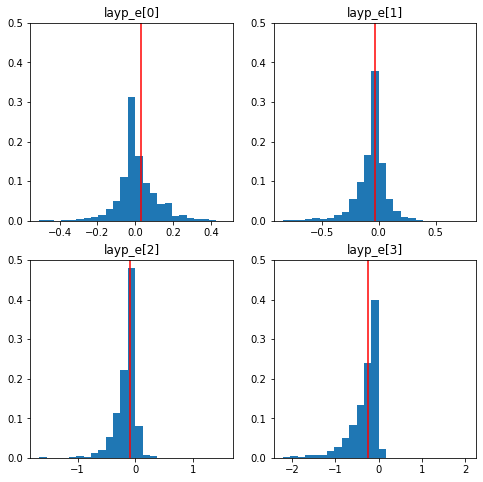

0.028886393


In [494]:
l = max(nolds.lyap_e(e_[:1000], debug_plot=True))
print(l)

In [482]:
nolds.lyap_r(a[:1000], emb_dim=10)

/home/mbastola/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


-2.0514115548158278e-05

In [310]:
x = np.arange(0, 100)
np.mod(x, 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [335]:
def fun(x, t, y):
    return x[0] * np.exp(-x[1] * t) * np.sin(x[2] * t) - y

def kernel_regression(n, data, l, m = 16, title=""):
    import cmath
    from scipy.optimize import least_squares
    c = n*1.0/l
    d = data[:l]
    x = np.arange(0, n)
    x_ = np.mod(x, m)
    x0 = np.ones(3)
    res_robust = least_squares(fun, x0, loss='arctan', f_scale=0.1, args=(x_[:l], d))
    print(*res_robust.x)
    A, sigma, omega = res_robust.x
    recomb = A * np.exp(-sigma * x_) * np.sin(omega * x_)
    print(recomb.shape)
    #print(*res_robust.x)
    #input()
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Kernel Regression: " + title)
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(x, data[:n], label = "original dataset",color = 'C0')
    plt.plot(x[l:],recomb[l:], label = "test set", color='C2')
    plt.plot(x[:l+1], data[:l+1], label = "training set", color='C1')
    plt.legend(loc='upper right')
    #plt.plot(x,recomb,x,sin3)
    #plt.show()
    

0.9999999973416409 3.757599238680227e-11 0.25132741243595147
(300,)


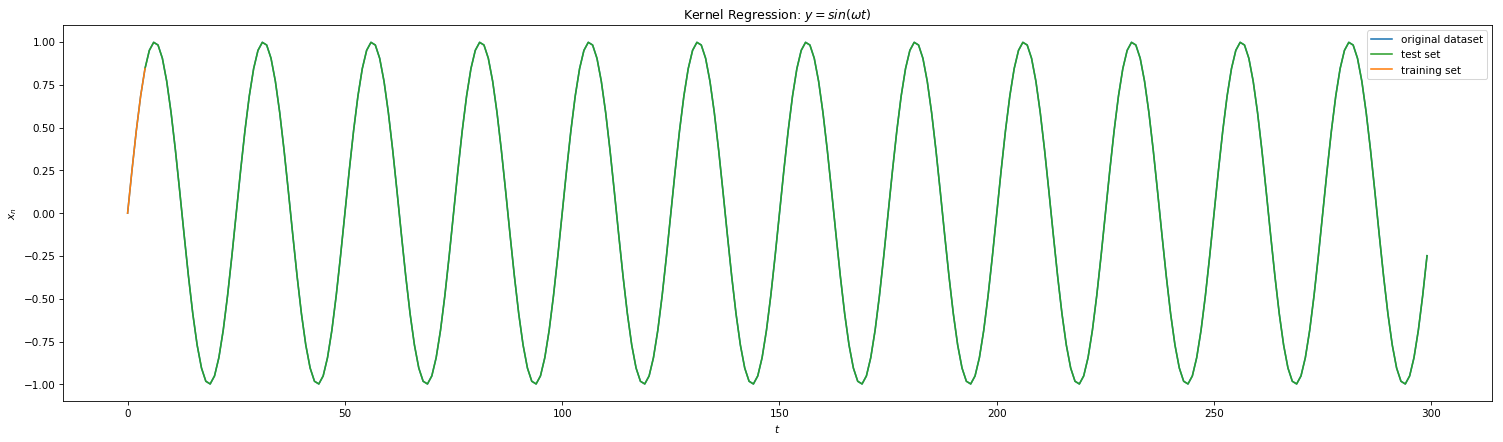

In [318]:
kernel_regression(300, d, 4,25, title_d)

1.1452411521897283 0.31462551887102996 1.15416937952218
(1000,)


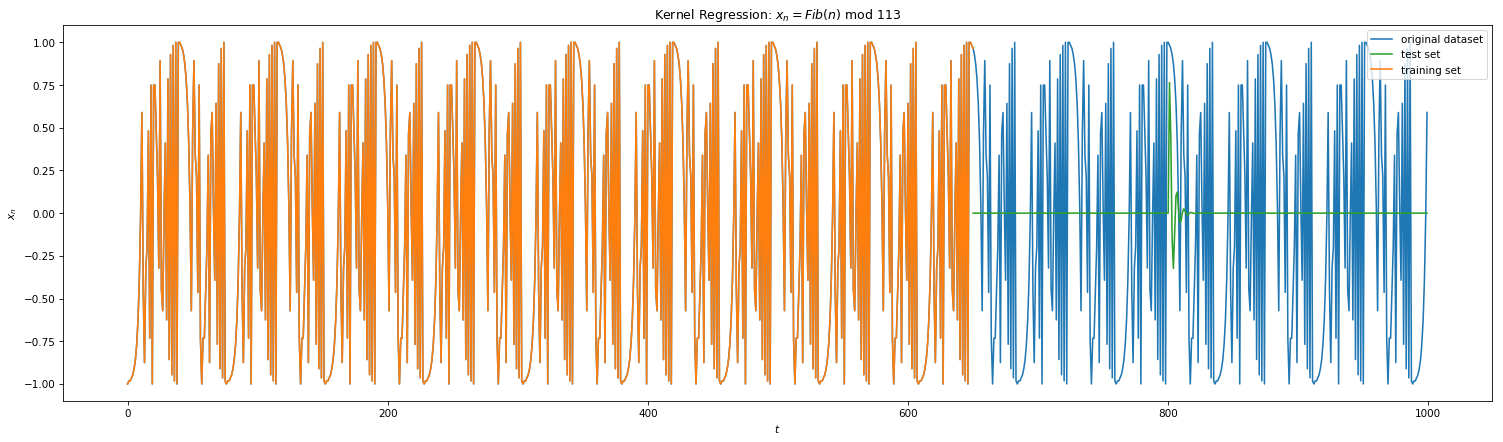

In [343]:
kernel_regression(1000, c_, 650, 400, title_c)

109.54179578239595 5.242318813036154 0.9387325985294795
(1000,)


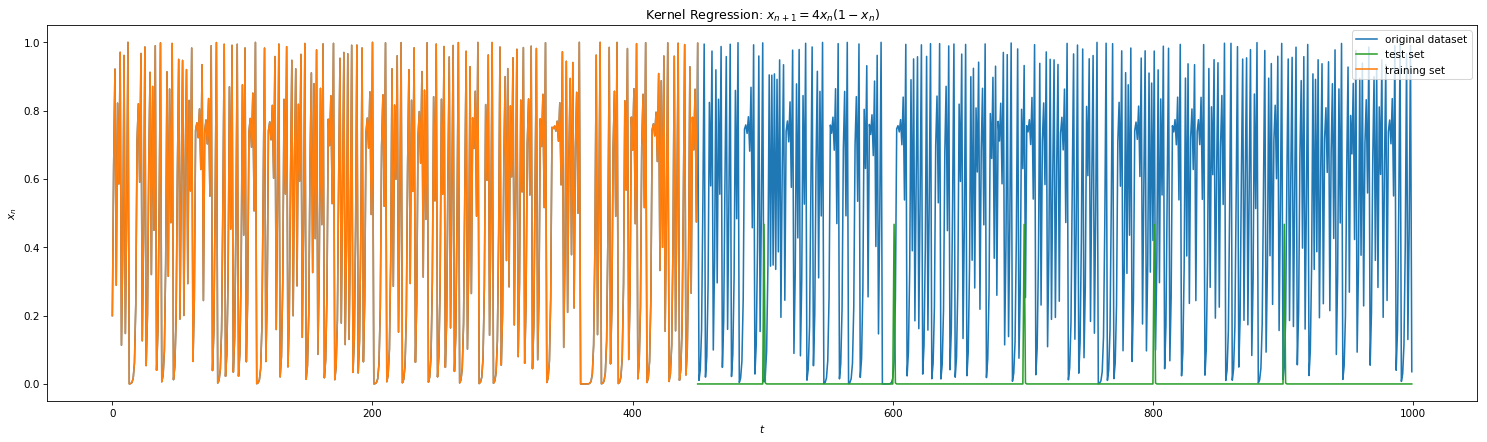

In [345]:
kernel_regression(1000, a, 450, 100, title_a)

-0.8823367643242679 0.1193082061368109 1.5224268522558082
(300,)


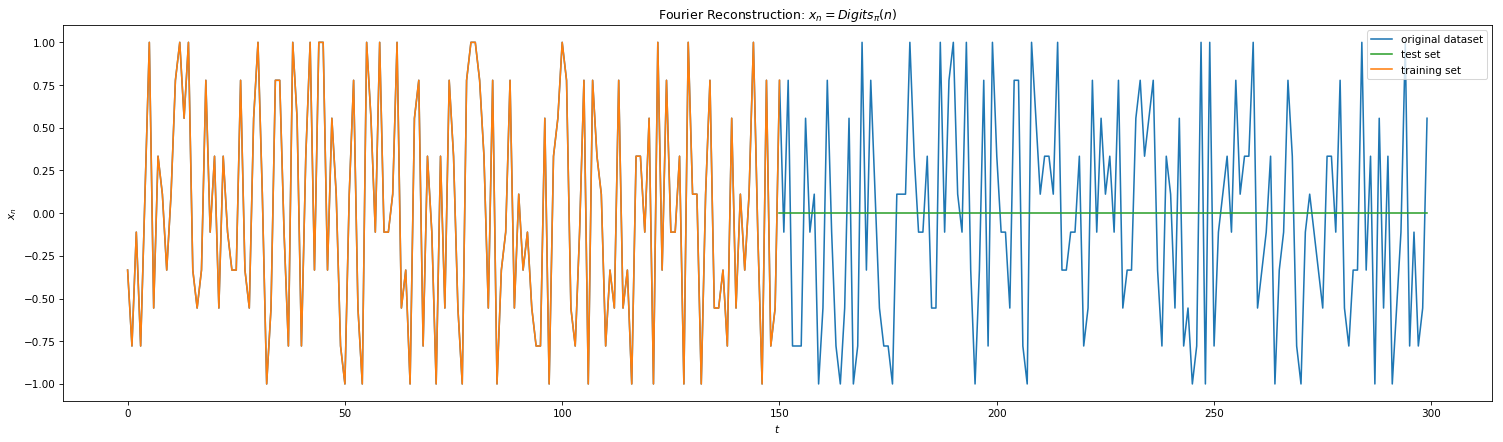

In [189]:
kernel_regression(300, e_, 150,title_e)

In [282]:
import pandas as pd
df = pd.DataFrame(c_[:150])

In [283]:
import statsmodels.tsa.api as smt
f=plt.figure(figsize=(12,6))
_=smt.seasonal_decompose(df[0]).plot()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

<Figure size 864x432 with 0 Axes>

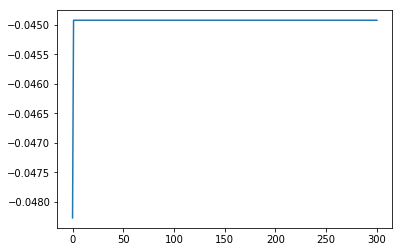

In [284]:
arma = smt.ARMA(df,order=(0,1,1))
arx_res = arma.fit()
arx_p = arx_res.predict(0,300,dynamic=True)
plt.plot(arx_p)

In [285]:
arma_mod20 = smt.ARMA(df, (3,0)).fit(disp=False)
print(arma_mod20.params)

const     -0.061151
ar.L1.0    0.001483
ar.L2.0    0.578441
ar.L3.0    0.002929
dtype: float64


In [289]:
predict_sunspots = arma_mod20.predict(3,150, dynamic=True)

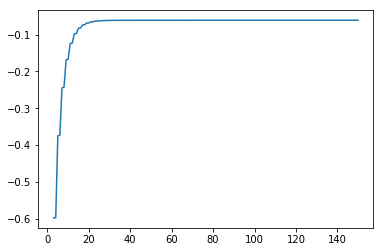

In [290]:
plt.plot(predict_sunspots)

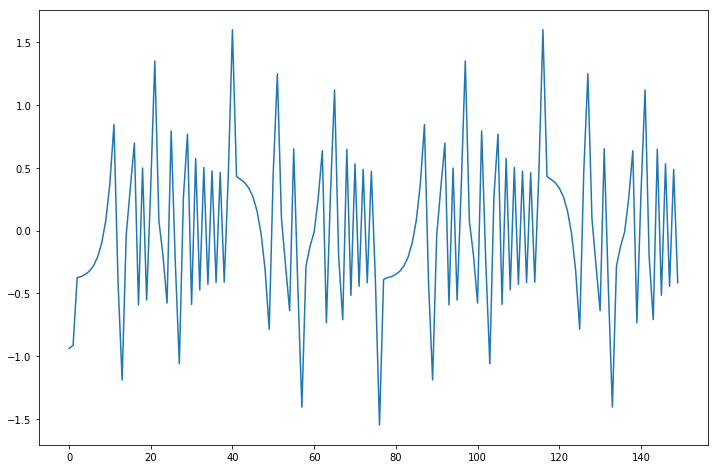

In [286]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [374]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 2312.7093')

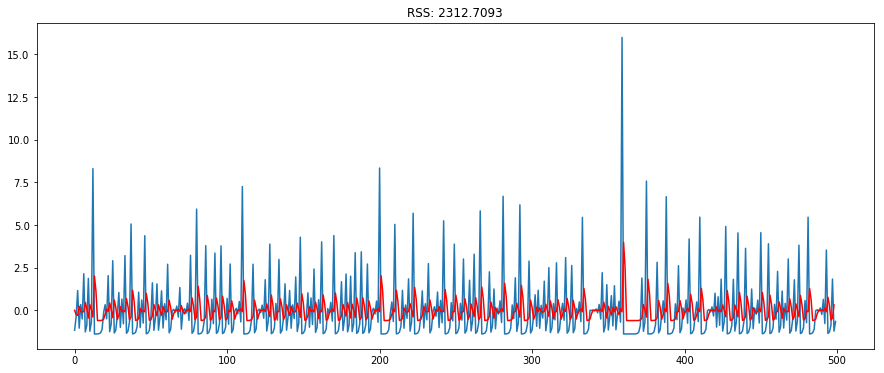

In [411]:
fig = plt.figure(figsize=(15,6))
model = ARIMA(a_log[:500], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(a_diff[:500])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-a_diff[:499])**2))

Text(0.5, 1.0, 'RSS: 3391.4674')

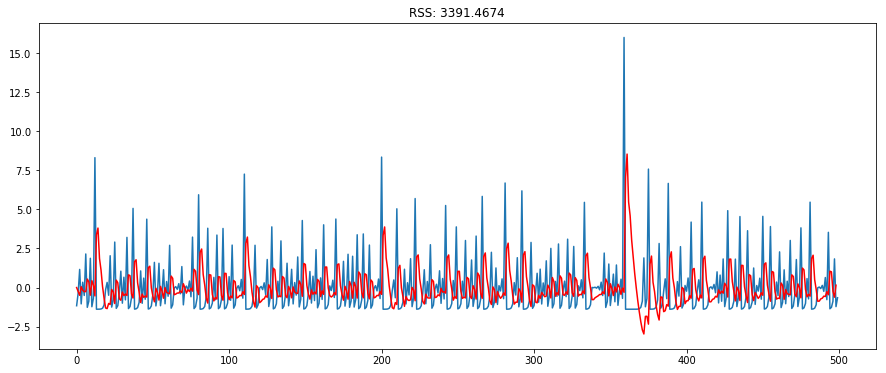

In [382]:
fig = plt.figure(figsize=(15,6))
model = ARIMA(a_log[:500], order=(0, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(a_diff[:500])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-a_diff[:499])**2))

In [542]:
model = ARIMA(a_[:301], order=(2, 1, 2))  
results_ARIMA = model.fit(solver='lbfgs', trend='c',maxiter=10000, tol=1e-10, full_output=1,disp=5)


/home/mbastola/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5, 1.0, 'RSS: 0.5205')

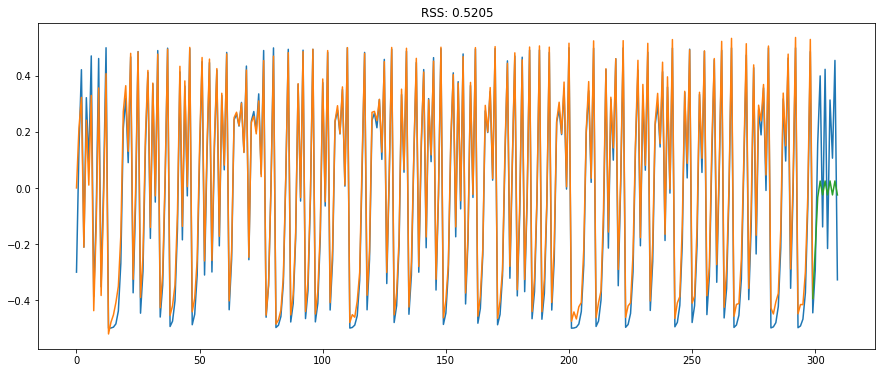

In [543]:
fig = plt.figure(figsize=(15,6))
results_ARp = results_ARIMA.predict(start=300, end=310)
plt.plot(a_[:310])
plt.plot(-1*results_ARIMA.fittedvalues)
plt.plot(t[299:310],-1*results_ARp)
plt.title('RSS: %.4f'% sum((-1*results_ARIMA.fittedvalues-a_[:300])**2))

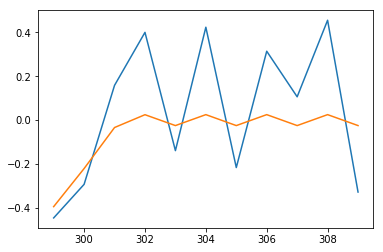

In [544]:
plt.plot(t[299:310],a_[299:310])
plt.plot(t[299:310],-1*results_ARp)

In [358]:
a_log = np.log(a)

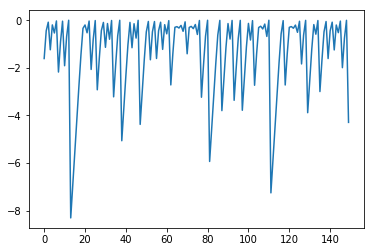

In [360]:
plt.plot(a_log[:150])

In [363]:
a_diff = a_log[:-1] - a_log[1:]

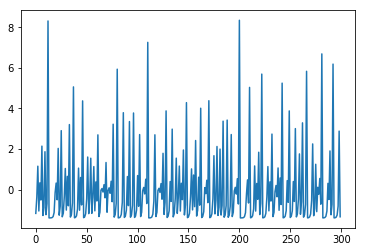

In [366]:
plt.plot(a_diff[:300])

In [367]:
a_Diff = a[:-1] - a[1:]

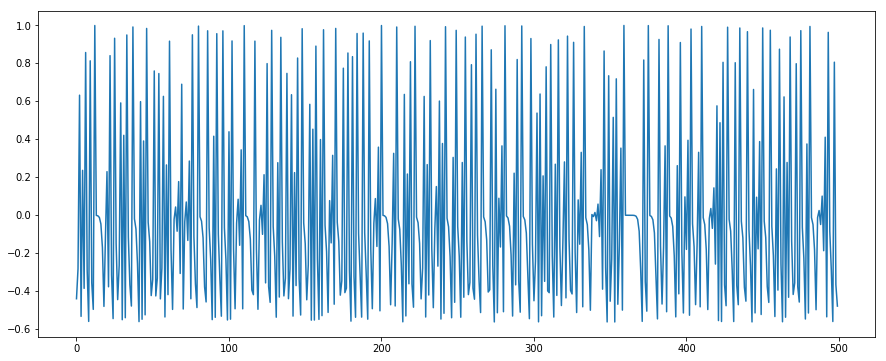

In [372]:
fig = plt.figure(figsize=(15,6))
plt.plot(a_Diff[:500])

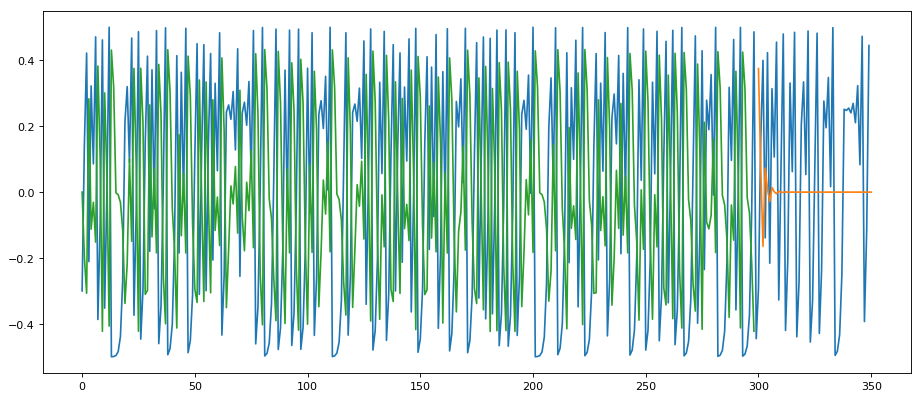

In [409]:
a_ =  (a-0.5)
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
model = ARIMA(a_[:300], order=(2, 1, 0))  
results_AR = model.fit(disp=-1)
results_ARp = results_AR.predict(start=300, end=350)
plt.plot(a_[:350])
plt.plot(t[300:351],results_ARp)
plt.plot(results_AR.fittedvalues)

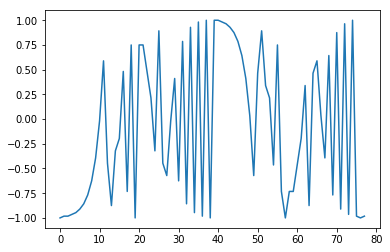

In [562]:
plt.plot(c_[:78])

Optimization terminated successfully.
         Current function value: 0.925199
         Iterations: 42
         Function evaluations: 47
         Gradient evaluations: 47


Text(0.5, 1.0, 'RSS: -156.7542')

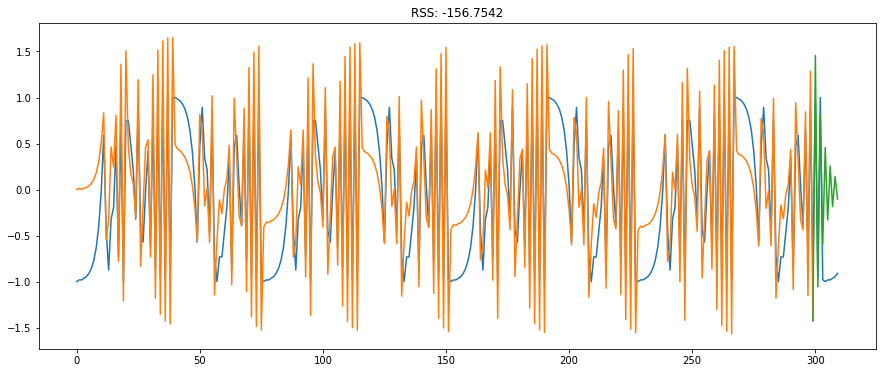

In [563]:
model = ARIMA(c_[:301], order=(2, 1, 2))  
results_ARIMA = model.fit(solver='bfgs', trend='c',maxiter=10000, tol=1e-10, full_output=1,disp=5)
fig = plt.figure(figsize=(15,6))
results_ARp = results_ARIMA.predict(start=300, end=310)
plt.plot(c_[:310])
plt.plot(-1*results_ARIMA.fittedvalues)
plt.plot(t[299:310],-1*results_ARp)
plt.title('RSS: %.4f'% sum((-1*results_ARIMA.fittedvalues-(c_[:300])**2)))

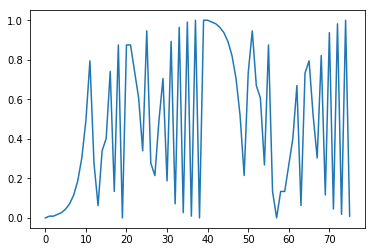

In [553]:
plt.plot((c_[:76]+1)/2)

In [679]:
def arima_reconstruct(n, data, l, order=(2,1,1) , title=""):
    import cmath
    c = n*1.0/l
    d = data[:l]
    x = np.arange(0, n)
    model = ARIMA(d, order=order)
    results_ARIMA = model.fit(solver='bfgs', trend='c',maxiter=10000, tol=1e-10, full_output=1,disp=5)
    #fig = plt.figure(figsize=(15,6))
    results_ARp = results_ARIMA.predict(start=l-1, end=n)

    #plt.plot(t[300:310],-1*results_ARp)
    #plt.title('RSS: %.4f'% sum((-1*results_ARIMA.fittedvalues-((e_[:300]+1)/2)**2)))
    print(results_ARp.shape)
    print(results_ARIMA.fittedvalues.shape)
    print(x.shape)
    l_ = results_ARIMA.fittedvalues.shape[0]
    
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Naive ARIMA {} Reconstruction: {}".format(order,title))
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(x, data[:n], label = "original dataset",color = 'C0')
    plt.plot(x[l-2:], -1*results_ARp , label = "test set", color='C2')
    plt.plot(x[:l_], -1*results_ARIMA.fittedvalues, label = "training set", color='C1')
    plt.legend(loc='upper right')
    #plt.plot(x,recomb,x,sin3)
    #plt.show()

Optimization terminated successfully.
         Current function value: 0.393447
         Iterations: 45
         Function evaluations: 59
         Gradient evaluations: 59
(52,)
(349,)
(400,)


/home/mbastola/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


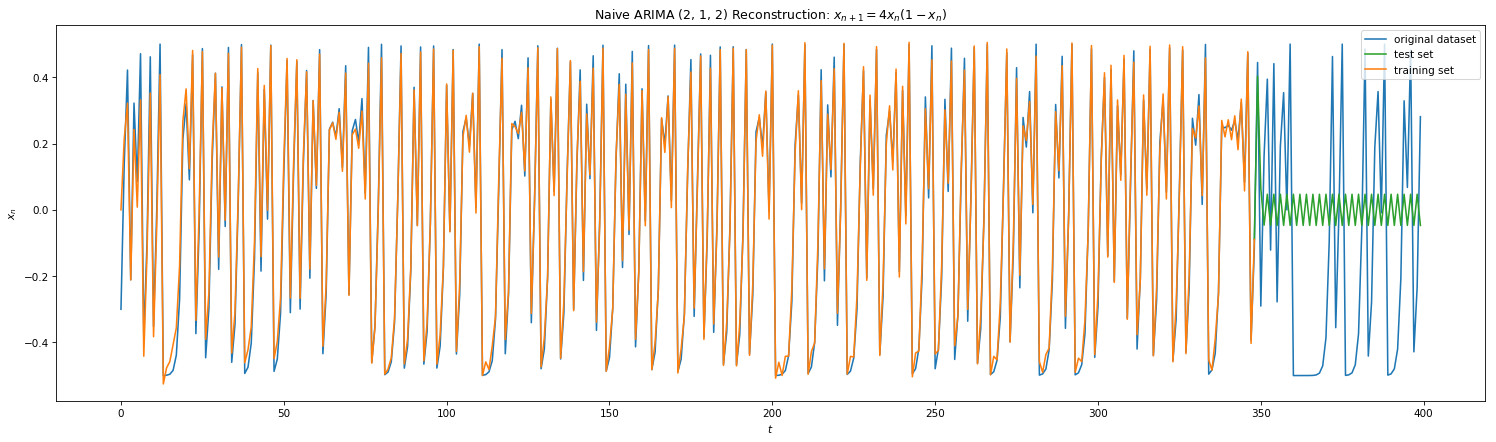

In [682]:
arima_reconstruct(400, a_,350, (2,1,2), title=title_a)

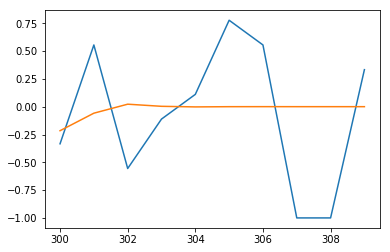

In [572]:
plt.plot(t[300:310],e_[300:310])
plt.plot(t[300:310],-1*results_ARp)

Optimization terminated successfully.
         Current function value: 0.959637
         Iterations: 30
         Function evaluations: 35
         Gradient evaluations: 35
(52,)
(349,)
(400,)


/home/mbastola/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


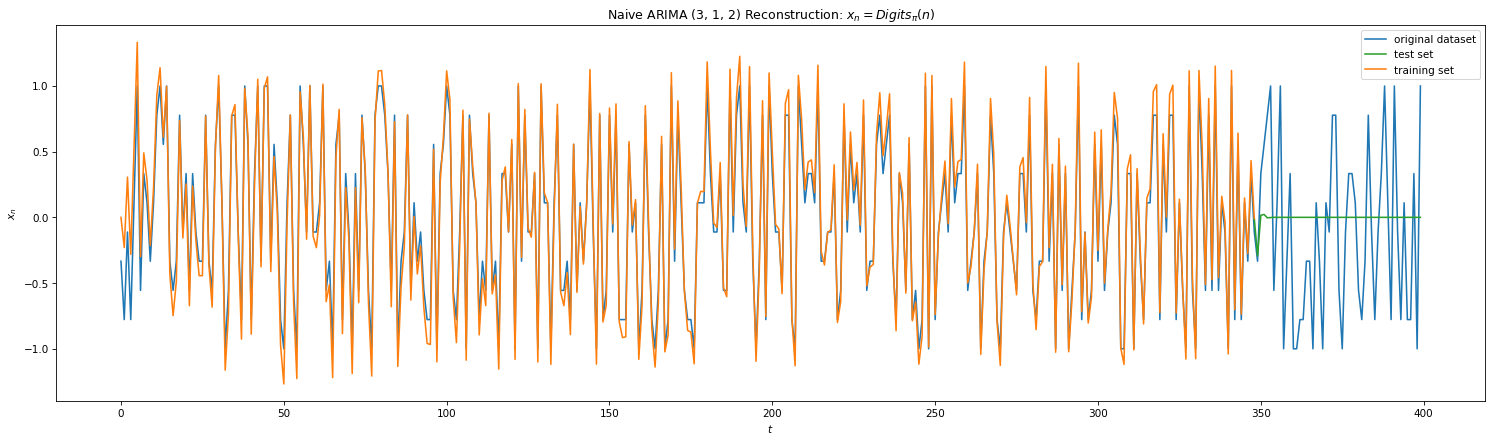

In [681]:
arima_reconstruct(400,e_,350, (3,1,2), title=title_e)

In [732]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def arima_reconstruct_stationary(n, data, l, order=(7,0,1) , lookback = 4 , title=""):
    import cmath
    c = n*1.0/l
    d = data[:l]

    d_diff = difference(d, lookback)

    x = np.arange(0, n)
    model = ARIMA(d_diff, order=order)
    results_ARIMA = model.fit(solver='bfgs', trend='c',maxiter=10000, tol=1e-10, full_output=1,disp=5)

    results_ARp_diff = results_ARIMA.predict(start=l-1, end=n)
    results_ARp = inverse_difference(d,results_ARp_diff, lookback )

    results_ARt = inverse_difference(d, results_ARIMA.fittedvalues, lookback)

    #results_ARp = np.exp(results_ARp_log)
    #results_ARt = np.exp(results_ARt_log)
    #plt.plot(t[300:310],-1*results_ARp)
    #plt.title('RSS: %.4f'% sum((-1*results_ARIMA.fittedvalues-((e_[:300]+1)/2)**2)))
    print(results_ARp.shape)
    print(results_ARt.shape)
    print(x.shape)
    l_ = results_ARt.shape[0]
    
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Stationary ARIMA l={}, {} Reconstruction: {}".format(lookback, order,title))
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(x, data[:n], label = "original dataset",color = 'C0')
    plt.plot(x[l-lookback-1:], -1*results_ARp , label = "test set", color='C2')
    plt.plot(x[:l_], -1*results_ARt, label = "training set", color='C1')
    plt.legend(loc='upper right')
    #plt.plot(x,recomb,x,sin3)
    #plt.show()

Optimization terminated successfully.
         Current function value: 1.074704
         Iterations: 40
         Function evaluations: 43
         Gradient evaluations: 43
(56,)
(345,)
(400,)


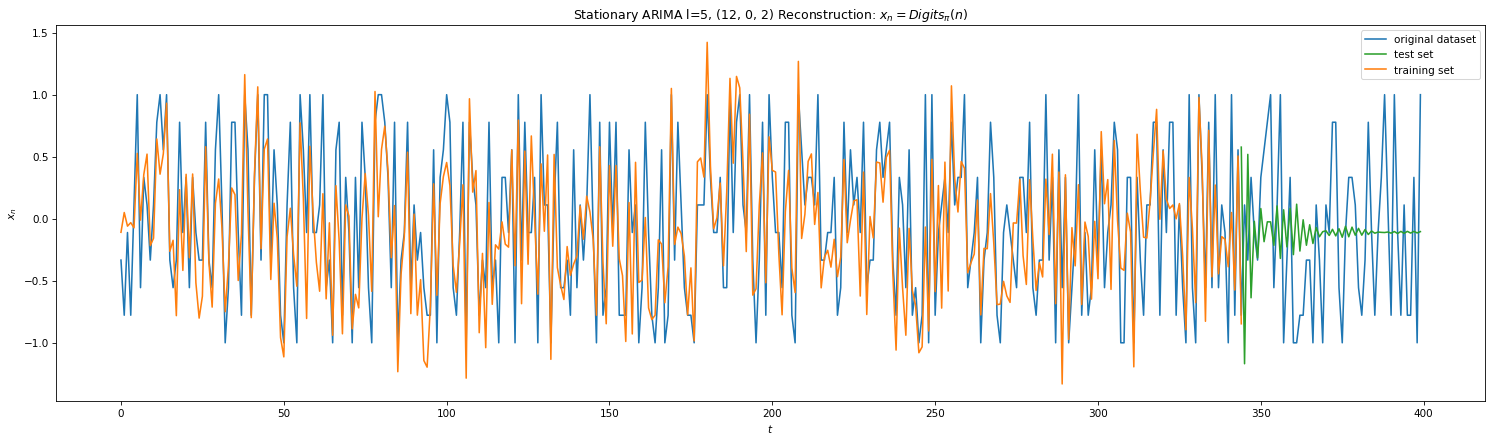

In [739]:
arima_reconstruct_stationary(400,e_,350, (12,0,2), 5, title=title_e)

Optimization terminated successfully.
         Current function value: 0.470610
         Iterations: 59
         Function evaluations: 62
         Gradient evaluations: 62
(56,)
(345,)
(400,)


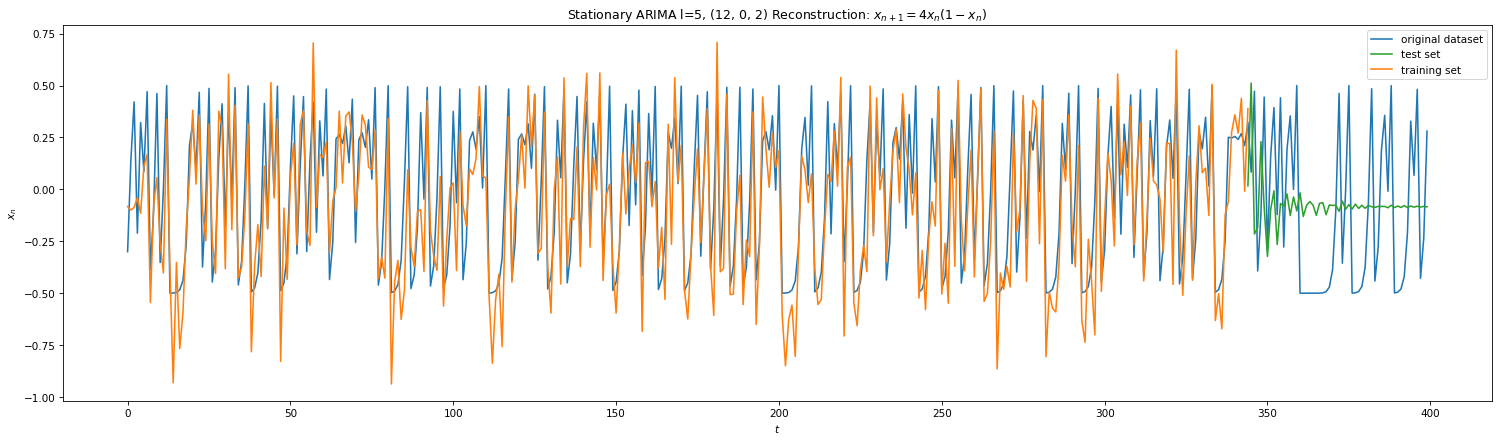

In [740]:
arima_reconstruct_stationary(400,a_,350, (12,0,2),5, title=title_a)

In [45]:
def kalman_reconstruct(n, data, l, lookahead = 1, title=""):
    l = l-1
    import filterpy.kalman as kf
    
    #c = n*1.0/l
    #d = data[:l]
    
    t = np.arange(0, n, lookahead)
    
    x = data[0]
    p = 1
    train_uncertainties = []
    train_predict = []
    print(x,p)
    for i in range(0,l, lookahead):
        x, p = kf.predict(x=x, P=p, u=0., Q=4)
        train_predict.append(x)
        train_uncertainties.append(p)
        x, p = kf.update(x=x, P=p, z=data[i+1], R=0.2)
    #print(x,p)
    #print(train_predict[-1], train_uncertainties[-1])
    test_predict = [train_predict[-1]]
    #test_predict = [x]
    test_uncertainties = [p]
    #x = train_predict[-1]
    #p = train_uncertainties[-1]
    for i in range(l, n, lookahead):
        x, p = kf.predict(x=x, P=1, u=0.0, Q=4, alpha=1.5)
        #print(x, p)
        #print(x)
        test_predict.append(x)
        #x += (np.random.rand(1)[0] - 0.5)*0.1
        test_uncertainties.append(p)
        x, p = kf.update(x=x, P=1, z=x, R=0)
    #print(test_predict)
    print(t.shape)
    print(len(train_predict))
    print(len(test_predict))
    
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Kalman Reconstruction (u=0,Q=4,R=0.2): {}".format(title))
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(data[:n], label = "original dataset",color = 'C0')
    plt.plot(t[:l//lookahead+1], train_predict, label = "training set", color='C1')
    #plt.errorbar(t[l-1:], test_predict , yerr=test_uncertainties, label = "test set", color='C2')
    plt.plot(t[(l-lookahead)//lookahead+1:], test_predict , label = "test set", color='C2')
    #plt.ylim(-1,1)
    plt.legend(loc='upper right')


In [128]:
np.random.rand(1)[0]

0.41205870615212026

-0.6 1
(134,)
117
18


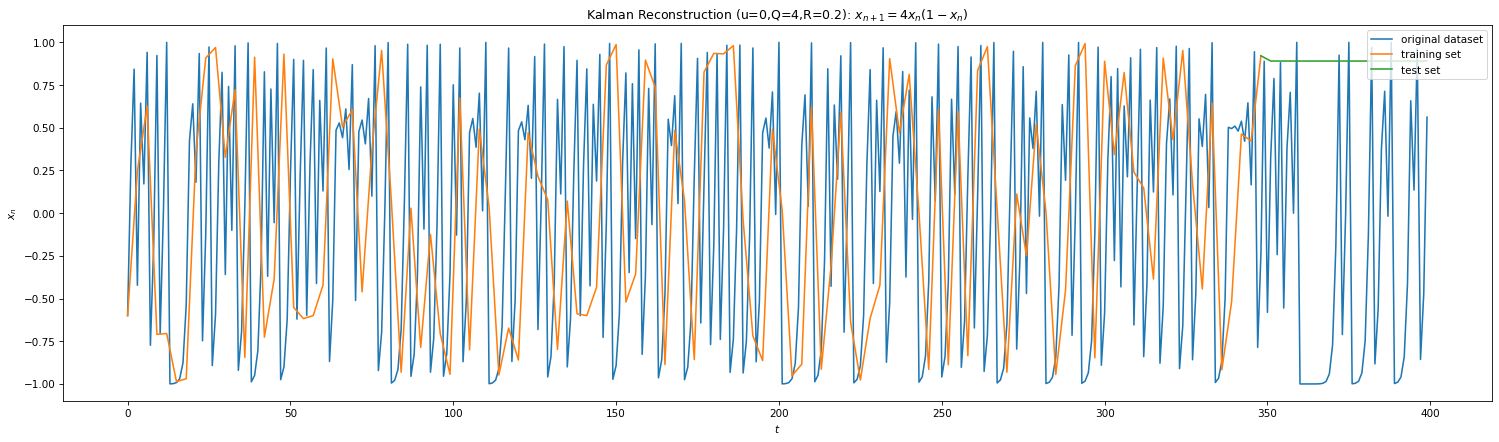

In [46]:
kalman_reconstruct(400,a_,350, 3, title=title_a)

0.0 1
-0.2597419774207589 0.19089023002066446


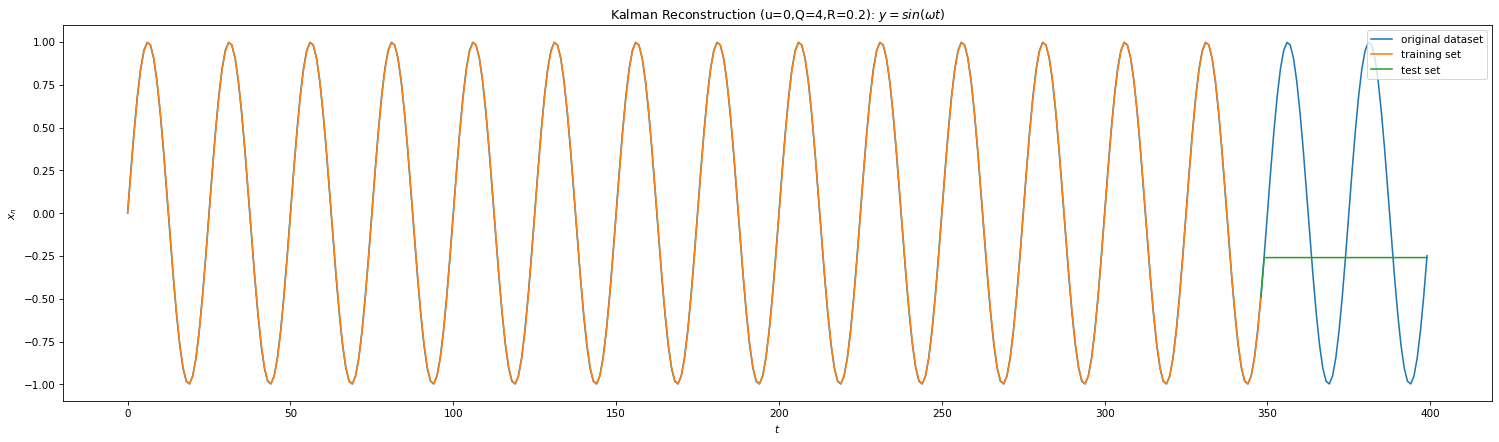

In [341]:
kalman_reconstruct(400,d,350, title=title_d)

In [51]:
def hx(x):
    return x

def HJacobian_at(x):
    sig_x = 1/(1 + np.exp(-x))
    return sig_x * (1-sig_x)
    #return sig_x
    
def extended_kalman_reconstruct(n, data, l, lookahead =1, title=""):
    from filterpy.kalman import ExtendedKalmanFilter
    l = l-1
    kf = ExtendedKalmanFilter(dim_x=1, dim_z=1)
    #c = n*1.0/l
    #d = data[:l]

    t = np.arange(0, n, lookahead)
    
    x = data[0]
    p = 1
    
    kf.x=x
    kf.p=p
    kf.Q=1
    kf.u = 0
    kf.R = 1
    train_predict = []
    for i in range(0,l, lookahead):
        kf.predict()
        train_predict.append(kf.x[0,0])
        kf.update(data[i+1], HJacobian_at, hx)
    
    test_predict = [train_predict[-1]]
    test_uncertainties = [p]
    for i in range(l, n, lookahead):
        kf.predict()
        test_predict.append(kf.x[0,0])
        test_uncertainties.append(kf.p)
        #kf.update(kf.x , HJacobian_at, hx)
        #kf.u = kf.p
        #x, p = kf.update(x=x, P=p, z=x, R=1)
    #print(test_predict)
    
    plt.figure(num=None, figsize=(20, 6), dpi=75, facecolor='w', edgecolor='k')
    plt.title("Extended Kalman Reconstruction (u=0,Q=1,R=1, H=Sigmoid Derivative): {}".format(title))
    plt.ylabel(r'$x_n$')
    plt.xlabel(r'$t$')
    plt.tight_layout()
    plt.plot(data[:n], label = "original dataset",color = 'C0')
    plt.plot(t[:l//lookahead+1], train_predict, label = "training set", color='C1')
    plt.plot(t[(l-lookahead)//lookahead+1:], test_predict , label = "test set", color='C2')
    #plt.ylim(-1,1)
    plt.legend(loc='upper right')

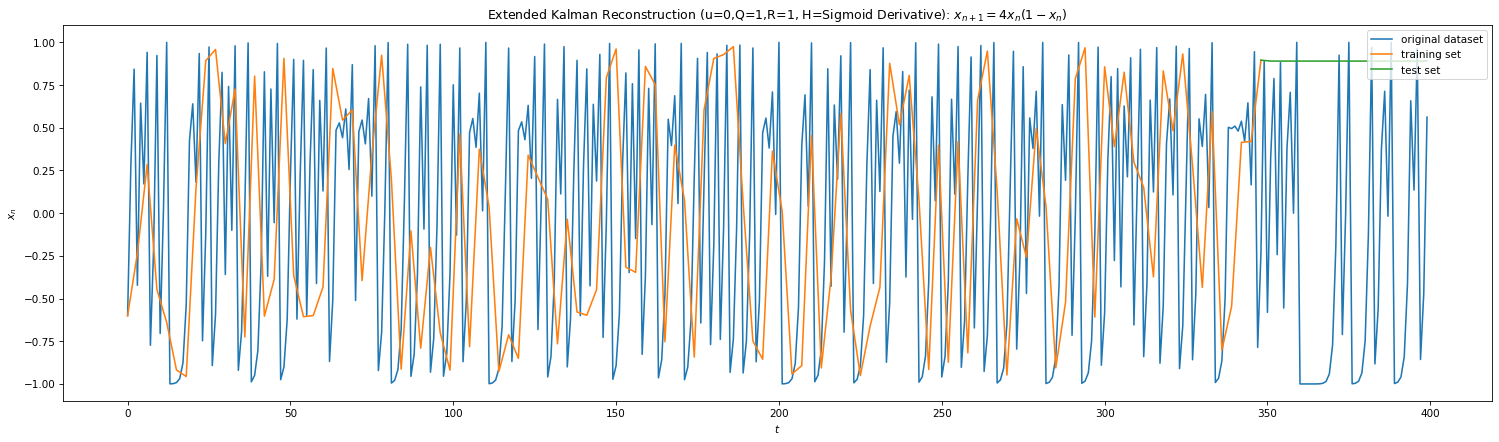

In [53]:
extended_kalman_reconstruct(400,a_,350, lookahead=3, title=title_a)

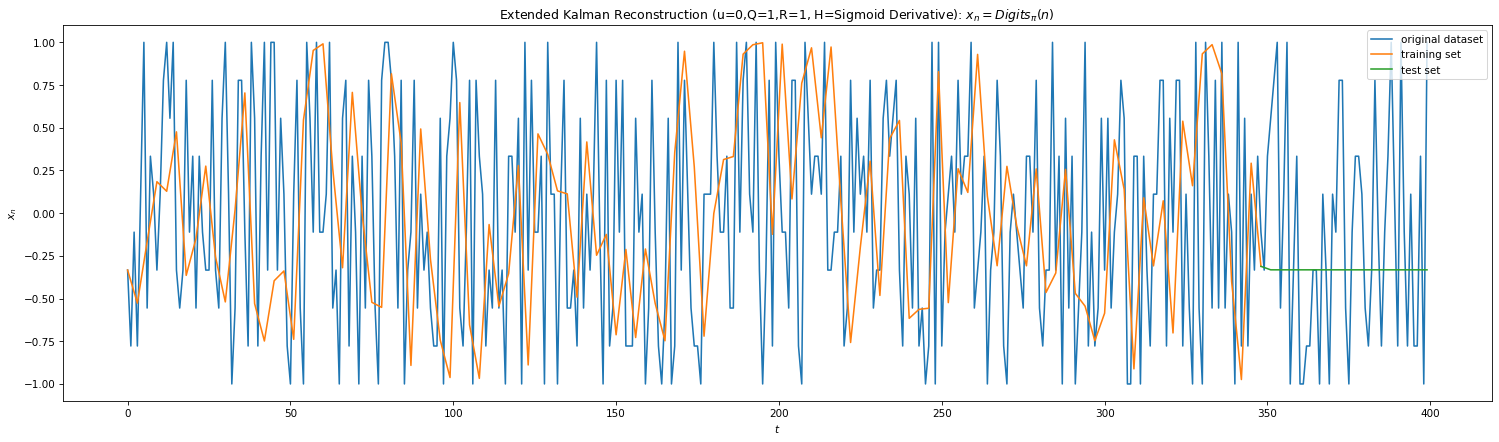

In [55]:
extended_kalman_reconstruct(400,e_,350, lookahead=3, title=title_e)